In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.transform import resize
import math
from skimage.feature import hog
import numpy as np

In [2]:
img = resize(color.rgb2gray(io.imread("./../pic/B.png")), (128, 64))

/tmp/ipykernel_2549/375570060.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = resize(color.rgb2gray(io.imread("./../pic/B.png")), (128, 64))


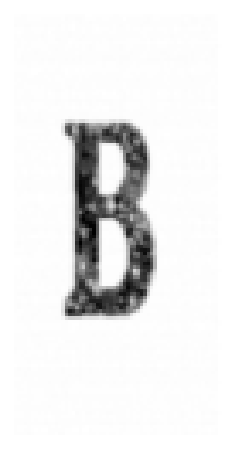

In [3]:
plt.figure(figsize=(15, 8))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [4]:
img.shape

(128, 64)

In [5]:
import sys
sys.path.append('./../DIP_py')
from basic_funcs import *
from edge import *

In [6]:
canny_h=np.array([-0.5,0,0.5])
canny_h=canny_h.reshape((1,-1))
canny_v=np.array([[0.5],[0],[-0.5]])

dx=convlution(img,canny_h)
dy=convlution(img,canny_v)

(128, 66)
(130, 64)


In [7]:
dx.shape,dy.shape

((128, 64), (128, 64))

In [18]:
mag=np.sqrt(dx**2+dy**2)
theta=np.arctan2(dx,dy)*180/np.pi%180

In [19]:
mag.shape,theta.shape

((128, 64), (128, 64))

In [32]:
out=np.zeros((16,8,9))
block_size=8

for m in range(16):
    for n in range(8):


        temp_t=theta [m*8 : (m+1)*8 , n*8 : (n+1)*8]

        temp_m=mag[m*8:(m+1)*8,n*8:(n+1)*8]
        for i in range(block_size):
            for j in range(block_size):
                part_out=np.zeros((9,))

                t_=temp_t[i,j]
                m_=temp_m[i,j]
                # 分给low bound
                pos_low=int(t_//20)
                value_low=(1-t_%20/20)*m_

                value_high=t_%20/20*m_

                part_out[pos_low]+=value_low

                part_out[(pos_low+1)%9]+=value_high


                out[m,n]=part_out


In [33]:
out

array([[[0.00000000e+00, 3.24503290e-04, 1.90925232e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 6.62459565e-04, 2.81460778e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.14855152e-03, 3.51107005e-04, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.85944051e-04, 1.79188035e-03, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         8.69516490e-05, 5.21563563e-04, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.46261118e-04, 5.61931050e-04, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.45343737e-04, 3.98400560e-04, 0.00000000e+00],
        [3.71779216e-04, 

In [50]:
lst=[]
for i in range(15):
    for j in range(7):
        x=out[i:i+2,j:j+2].reshape(36)
        x/=np.sqrt(np.sum(x**2))
        lst.append(x)
lst=np.array(lst)


(105, 36)